<a href="https://colab.research.google.com/github/KarenParraA/ColabNotebooks/blob/main/Trabajo_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Trabajo Final** 

Nombre: Karen Parra


##Descripción: 
Base de datos sobre la calidad presente en varios vinos rojos de "Viña verde" en Portugal.

Se tiene una variable dependiente la cual corresponde a Calidad. Y 10 variables independientes: acidez volatil, acido cítrico, azucar residual, cloruros, dioxido de azufre libre, dioxido de azufre total, densidad, ph, sulfatos y alcohol. 


##Objetivo

Analizar una base de datos y determinar las variables mas influyentes en la calidad del vino.

##Taller final "Python-Introductorio"

**1.-	Mencionar posibles aplicaciones en el mundo real para el dataset utilizado.**

Actualmente, existen varios mecanismos para determinar la calidad de un vino, siendo la mayoria de estos mediante una forma subjetiva. Al poder recolectar la percepción de calidad del vino (variable dependiente) y compararla con sus caracteristicas físicas y químicas, se podría determinar la calidad de un vino mediante analisis de datos.

Su aplicación en el futuro sería poder crear un algoritmo mediante entrenamiento, con lo cual al medir las caracteristicas físico químicas se pueda predecir su calidad y percepcion a los consumidores. Permitiendo así, a las empresas del sector una mejor innovación, competitividad y calidad de vino.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
red_wine = pd.read_csv('drive/MyDrive/Colab Notebooks/winequality-red.csv', delimiter=";")

In [ ]:
red_wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


**2.- Describir el nombre de las columnas disponibles, su definición y el tipo de datos que almacena cada una de ellas.**

In [ ]:
#Identificar las columnas disponibles
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
#Verificar el tipo de datos que almacena cada columna
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Se confirma que el tipo de datos en la base de datos es correcta, todas las variables independieintes son cuantitativas por lo cual se le debe dar tratamiento como **float**. Sin embargo, la variable de calidad es cualitativa, mediante un rango 0-5, por lo cual se le debe dar tratamiento como **int64** 

**3.-	Revisar si existen datos perdidos y explicar posibles motivos.**

In [ ]:
np.sum(red_wine.isna())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No existen daatos perdidos en la base de datos

**4.-	Revisar si existen datos duplicados y explicar posibles motivos.**

In [ ]:
red_wine.shape

(1599, 12)

In [ ]:
np.sum(red_wine.duplicated())

240

In [ ]:
print('El porcentaje de valores duplicados en la Base de datos es de:', 240*100/1599, '%')

El porcentaje de valores duplicados en la Base de datos es de: 15.0093808630394 %


Se confirma que existen 240 datos duplicados, que corresponden al 15% de la base de datos, por lo cual se procede a darle un tratamiento y eliminar estos duplicados


In [ ]:
#Confirmar que la informacion de las filas son o no iguales, al analizar la tabla vemos que no existe la posibilidad que hayan realizado dos pruebas de todos los ensayos 
#al mismo lote y sacar exactamente los mismo resultados en todaas las variables, por lo cual, se procede a eliminar los valores repetidos
red_wine[red_wine.duplicated(keep=False)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
22,7.9,0.430,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1567,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1579,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1581,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


Verificamos que las duplicados tienen la misma información, no podemos hablar que todo el registro esta duplicado, si no un 15%.

In [ ]:
#Eliminación de los 240 valores duplicados
red_wine.shape

(1599, 12)

In [ ]:
red_wine=red_wine.drop_duplicates()
red_wine.shape

(1359, 12)

**5.-	Obtener estadísticas descriptivas de todo el dataset.**

In [ ]:
red_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


**6.-	Obtener estadísticas descriptivas por grupos relevantes en el dataset.**

Identificaremos si existe una distribución normal en alguna de las variables. Para ellos determinamos si el valor de curtosis es cero.

Como la distribución no es normal para ninguna de las varibles, y tenemos una variable **calidad** parametrica. Decido identificar si existe una correlacion entre las variables con calidad del vino mediante una correlacion de Spearman

In [ ]:
from pandas.core.arrays.categorical import Ordered
#Correlacion de las varibales
red_wine_correlation = {
    "Fixed acidity - Quality" : red_wine['fixed acidity'].corr(red_wine['quality'], method='spearman'),
    "Volatile acidity - Quality" : red_wine['volatile acidity'].corr(red_wine['quality'], method='spearman'),
    "Citric acid - Quality": red_wine['citric acid'].corr(red_wine['quality'], method='spearman'),
    "Residual suga - Quality" : red_wine['residual sugar'].corr(red_wine['quality'], method='spearman'),
    "Chlorides - Quality": red_wine['chlorides'].corr(red_wine['quality'], method='spearman'),
    "sulfur dioxide" : red_wine['free sulfur dioxide'].corr(red_wine['quality'], method='spearman'),
    "total sulfur dioxide" : red_wine['total sulfur dioxide'].corr(red_wine['quality'], method='spearman'),
    "density" : red_wine['density'].corr(red_wine['quality'], method='spearman'),
    "pH": red_wine['pH'].corr(red_wine['quality'], method='spearman'),
    "sulphates" : red_wine['sulphates'].corr(red_wine['quality'], method='spearman'),
    "alcohol": red_wine['alcohol'].corr(red_wine['quality'], method='spearman'),
}
red_wine_correlation_df = pd.DataFrame([red_wine_correlation], index=["Correlación total"]).T
red_wine_correlation_df


,Correlación total
Fixed acidity - Quality,0.111693
Volatile acidity - Quality,-0.387450
Citric acid - Quality,0.219427
Residual suga - Quality,0.025749
Chlorides - Quality,-0.204360
sulfur dioxide,-0.058746
total sulfur dioxide,-0.196620
density,-0.184302
pH,-0.042738
sulphates,0.380581


Podemos observar que todas las variables tienen una correlación baja. La acidez volatil, los sulfatos y el alcohol son los más cercanos a tener un tipo de relación directa o indirecta con la calidad del vino. Por lo tanto decido analizar las carácteristicas estidisticas de una forma categórica, mediante categorias de calidad del vino. Siendo de 3-4 Baja. 4-5 Media. 6-8 Alta.

In [ ]:
filter_low = red_wine[red_wine.quality.isin([3,4])]
filter_low.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,63.0,7.871429,1.649284,4.6000,6.800000,7.5000,8.4000,12.500
volatile acidity,63.0,0.724206,0.247970,0.2300,0.565000,0.6800,0.8825,1.580
citric acid,63.0,0.173651,0.207406,0.0000,0.020000,0.0800,0.2700,1.000
residual sugar,63.0,2.684921,1.723735,1.2000,1.900000,2.1000,2.9500,12.900
chlorides,63.0,0.095730,0.075121,0.0450,0.068500,0.0800,0.0945,0.610
free sulfur dioxide,63.0,12.063492,9.076508,3.0000,5.000000,9.0000,15.5000,41.000
total sulfur dioxide,63.0,34.444444,26.395123,7.0000,13.500000,26.0000,48.0000,119.000
density,63.0,0.996689,0.001667,0.9934,0.995655,0.9966,0.9977,1.001
pH,63.0,3.384127,0.175100,2.7400,3.300000,3.3800,3.5000,3.900
sulphates,63.0,0.592222,0.224323,0.3300,0.495000,0.5600,0.6000,2.000


In [ ]:
filter_med = red_wine[red_wine.quality.isin([5,6])]
filter_med.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1112.0,8.251169,1.682220,4.70000,7.10000,7.8000,9.1000,15.90000
volatile acidity,1112.0,0.538898,0.171598,0.16000,0.41000,0.5350,0.6450,1.33000
citric acid,1112.0,0.261286,0.189294,0.00000,0.09000,0.2400,0.4100,0.79000
residual sugar,1112.0,2.484397,1.322635,0.90000,1.90000,2.2000,2.6000,15.50000
chlorides,1112.0,0.089691,0.049863,0.03400,0.07100,0.0800,0.0910,0.61100
free sulfur dioxide,1112.0,16.428058,10.471974,1.00000,8.00000,15.0000,23.0000,72.00000
total sulfur dioxide,1112.0,49.424910,33.084561,6.00000,24.00000,41.0000,66.0000,165.00000
density,1112.0,0.996834,0.001797,0.99007,0.99578,0.9968,0.9979,1.00369
pH,1112.0,3.309083,0.152797,2.86000,3.21000,3.3100,3.4000,4.01000
sulphates,1112.0,0.648094,0.168007,0.37000,0.54000,0.6100,0.7000,1.98000


In [ ]:
filter_high = red_wine[red_wine.quality.isin([7,8])]
filter_high.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,184.0,8.820109,1.984634,4.90000,7.400000,8.7000,10.100000,15.6000
volatile acidity,184.0,0.405870,0.141576,0.12000,0.310000,0.3700,0.482500,0.9150
citric acid,184.0,0.372880,0.193280,0.00000,0.300000,0.4000,0.490000,0.7600
residual sugar,184.0,2.703804,1.375751,1.20000,1.900000,2.3000,2.800000,8.9000
chlorides,184.0,0.076049,0.030076,0.01200,0.062000,0.0715,0.085000,0.3580
free sulfur dioxide,184.0,13.972826,10.284575,3.00000,6.000000,11.0000,17.000000,54.0000
total sulfur dioxide,184.0,35.358696,34.283798,7.00000,17.000000,26.5000,42.250000,289.0000
density,184.0,0.995963,0.002172,0.99064,0.994665,0.9957,0.997305,1.0032
pH,184.0,3.288587,0.154542,2.88000,3.200000,3.2700,3.370000,3.7800
sulphates,184.0,0.745598,0.133926,0.39000,0.657500,0.7400,0.820000,1.3600


Se concluye que las variables que presentan una correlación moderada con la calidad del vino son: alcohol, sulfatos, y ácidez volatil. De ahora en adelante se trabajará con el análisis de esos parámetros. 

##Taller final "Python-Intermedio"

**1.- Realizar pruebas de normalidad sobre todas las variables numéricas.**

In [ ]:
#Variable alcohol
stat, p = stats.shapiro(red_wine.quality)
print('stat=%.3f,p=%.3f' % (stat, p))
if p > 0.05: 
  print('No se rechaza la hipótesis nula de que los datos de alcohol sigan una distribucion normal')
else:
  print('Se rechaza la hipótesis nula de que los datos de alcohol siguen una distribución normal')

stat=0.864,p=0.000
Se rechaza la hipótesis nula de que los datos de alcohol siguen una distribución normal


In [ ]:
#Variable sulfatos
stat, p = stats.shapiro(red_wine.sulphates)
print('stat=%.3f,p=%.3f' % (stat, p))
if p > 0.05: 
  print('No se rechaza la hipótesis nula de que los datos de sulfatos sigan una distribucion normal')
else:
  print('Se rechaza la hipótesis nula de que los datos de sulfatos siguen una distribución normal')

stat=0.830,p=0.000
Se rechaza la hipótesis nula de que los datos de sulfatos siguen una distribución normal


In [ ]:
#Variable pH
stat, p = stats.normaltest(red_wine.pH)
print('stat=%.3f,p=%.3f' % (stat, p))
if p > 0.05: 
  print('No se rechaza la hipótesis nula de que los datos de pH sigan una distribucion normal')
else:
  print('Se rechaza la hipótesis nula de que los datos de pH siguen una distribución normal')

stat=35.078,p=0.000
Se rechaza la hipótesis nula de que los datos de pH siguen una distribución normal


In [ ]:
#Variable density
stat, p = stats.normaltest(np.log(red_wine.density))
print('stat=%.3f,p=%.3f' % (stat, p))
if p > 0.05: 
  print('No se rechaza la hipótesis nula de que los datos de densidad sigan una distribucion normal')
else:
  print('Se rechaza la hipótesis nula de que los datos de densidad siguen una distribución normal')

stat=21.514,p=0.000
Se rechaza la hipótesis nula de que los datos de densidad siguen una distribución normal


In [ ]:
#Variable oxidos de azufre totales
stat, p = stats.normaltest(red_wine['total sulfur dioxide'])
print('stat=%.3f,p=%.3f' % (stat, p))
if p > 0.05: 
  print('No se rechaza la hipótesis nula de que los datos de oxidos de azufre totales sigan una distribucion normal')
else:
  print('Se rechaza la hipótesis nula de que los datos de oxidos de azufre totales siguen una distribución normal')

stat=428.450,p=0.000
Se rechaza la hipótesis nula de que los datos de oxidos de azufre totales siguen una distribución normal


In [ ]:
#Variable oxidos de azufre libres
stat, p = stats.normaltest(red_wine['free sulfur dioxide'])
print('stat=%.3f,p=%.3f' % (stat, p))
if p > 0.05: 
  print('No se rechaza la hipótesis nula de que los datos de oxidos de azufre libres sigan una distribucion normal')
else:
  print('Se rechaza la hipótesis nula de que los datos de oxidos de azufre libres siguen una distribución normal')

stat=281.007,p=0.000
Se rechaza la hipótesis nula de que los datos de oxidos de azufre libres siguen una distribución normal


In [ ]:
#Variable de cloruros
stat, p = stats.normaltest(np.log(red_wine['chlorides']))
print('stat=%.3f,p=%.3f' % (stat, p))
if p > 0.05: 
  print('No se rechaza la hipótesis nula de que los datos de cloruros sigan una distribucion normal')
else:
  print('Se rechaza la hipótesis nula de que los datos de cloruros siguen una distribución normal')

stat=608.605,p=0.000
Se rechaza la hipótesis nula de que los datos de cloruros siguen una distribución normal


In [ ]:
#Variable de azucar residual
stat, p = stats.normaltest(red_wine['residual sugar'])
print('stat=%.3f,p=%.3f' % (stat, p))
if p > 0.05: 
  print('No se rechaza la hipótesis nula de que los datos de azucar residual sigan una distribucion normal')
else:
  print('Se rechaza la hipótesis nula de que los datos de azucar residual siguen una distribución normal')

stat=1302.663,p=0.000
Se rechaza la hipótesis nula de que los datos de azucar residual siguen una distribución normal


In [ ]:
#Variable de ácido cítrico
stat, p = stats.normaltest(red_wine['citric acid'])
print('stat=%.3f,p=%.3f' % (stat, p))
if p > 0.05: 
  print('No se rechaza la hipótesis nula de que los datos de ácido cítrico sigan una distribucion normal')
else:
  print('Se rechaza la hipótesis nula de que los datos de ácido cítrico siguen una distribución normal')

stat=128.041,p=0.000
Se rechaza la hipótesis nula de que los datos de ácido cítrico siguen una distribución normal


In [ ]:
#Variable de ácidez volátil
stat, p = stats.normaltest(red_wine['volatile acidity'])
print('stat=%.3f,p=%.3f' % (stat, p))
if p > 0.05: 
  print('No se rechaza la hipótesis nula de que los datos de ácidez volátil sigan una distribucion normal')
else:
  print('Se rechaza la hipótesis nula de que los datos de ácidez volátil siguen una distribución normal')

stat=135.986,p=0.000
Se rechaza la hipótesis nula de que los datos de ácidez volátil siguen una distribución normal


In [ ]:
#Variable de ácidez fija
stat, p = stats.normaltest(red_wine['fixed acidity'])
print('stat=%.3f,p=%.3f' % (stat, p))
if p > 0.05: 
  print('No se rechaza la hipótesis nula de que los datos de ácidez fija sigan una distribucion normal')
else:
  print('Se rechaza la hipótesis nula de que los datos de ácidez fija siguen una distribución normal')

stat=178.035,p=0.000
Se rechaza la hipótesis nula de que los datos de ácidez fija siguen una distribución normal


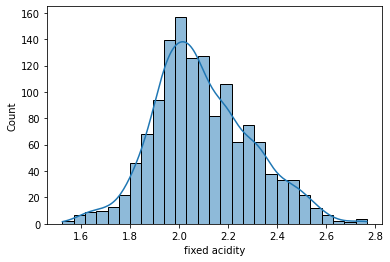

In [ ]:
sns.histplot(x=np.log(red_wine['fixed acidity']), kde=True)

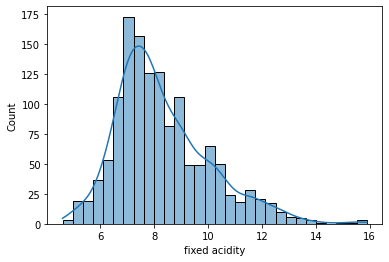

In [ ]:
sns.histplot(x=red_wine['fixed acidity'], kde=True)

**2.- Escoge una o varias variables categóricas relevantes** 

Solo se tiene una variable categorica, la cual es la calidad del vino. Se considerará una calidad baja cuando la puntuación sea 3 y 4, calildad media cuando la puntuación sea 5 y 6, y calidad alta cuando la puntuacion es 7 y 8.

**3.- Realiza prueba de hipótesis de comparación de varianzas de todas las variables numéricas entre la varible categórica escogida**

Analisis de varianza del alcohol 

In [ ]:
alcohol_bajo = red_wine.loc[red_wine.quality.isin([3,4]),'alcohol'].values
alcohol_medio = red_wine.loc[red_wine.quality.isin([5,6]),'alcohol'].values
alcohol_alto = red_wine.loc[red_wine.quality.isin([7,8]),'alcohol'].values

In [ ]:
print('Varianza del alcohol en calidad baja:', alcohol_bajo.var())
print('Varianza del alcohol en calidad media:', alcohol_medio.var())
print('Varianza del alcohol en calidad alta:', alcohol_alto.var())

Varianza del alcohol en calidad baja: 0.8296686822877299
Varianza del alcohol en calidad media: 0.973872197206264
Varianza del alcohol en calidad alta: 1.0191331177142415


In [ ]:
stat, p = stats.bartlett(alcohol_bajo, alcohol_medio, alcohol_alto)
print('stat=%.3f, p=%.3f' % (stat,p))
if p>0.05:
  print('No se rechaza la hipótesis nula de que las varianzas sean iguales en todas las muestras')
else:
  print('Se rechaza la hipótesis nula de que las varianzas sean iguales en todas las muestras')

stat=0.852, p=0.653
No se rechaza la hipótesis nula de que las varianzas sean iguales en todas las muestras


Análisis de varianza de sulfatos

In [ ]:
sulphates_bajo = red_wine.loc[red_wine.quality.isin([3,4]),'sulphates'].values
sulphates_medio = red_wine.loc[red_wine.quality.isin([5,6]),'sulphates'].values
sulphates_alto = red_wine.loc[red_wine.quality.isin([7,8]),'sulphates'].values
print('Varianza de sulfatos en calidad baja:', sulphates_bajo.var())
print('Varianza de sulfatosl en calidad media:', sulphates_medio.var())
print('Varianza de sulfatos en calidad alta:', sulphates_alto.var())
stat, p = stats.bartlett(sulphates_bajo, sulphates_medio, sulphates_alto)
print('stat=%.3f, p=%.3f' % (stat,p))
if p>0.05:
  print('No se rechaza la hipótesis nula de que las varianzas sean iguales en todas las muestras')
else:
  print('Se rechaza la hipótesis nula de que las varianzas sean iguales en todas las muestras')

Varianza de sulfatos en calidad baja: 0.049522045855379206
Varianza de sulfatosl en calidad media: 0.028201041612752963
Varianza de sulfatos en calidad alta: 0.017838773038752365
stat=28.722, p=0.000
Se rechaza la hipótesis nula de que las varianzas sean iguales en todas las muestras


Análisis de variaz de pH

In [ ]:
pH_bajo = red_wine.loc[red_wine.quality.isin([3,4]),'pH'].values
pH_medio = red_wine.loc[red_wine.quality.isin([5,6]),'pH'].values
pH_alto = red_wine.loc[red_wine.quality.isin([7,8]),'pH'].values
print('Varianza de pH en calidad baja:', pH_bajo.var())
print('Varianza de pH en calidad media:', pH_medio.var())
print('Varianza de pH en calidad alta:', pH_alto.var())
stat, p = stats.bartlett(pH_bajo, pH_medio, pH_alto)
print('stat=%.3f, p=%.3f' % (stat,p))
if p>0.05:
  print('No se rechaza la hipótesis nula de que las varianzas sean iguales en todas las muestras')
else:
  print('Se rechaza la hipótesis nula de que las varianzas sean iguales en todas las muestras')

Varianza de pH en calidad baja: 0.030173444192491815
Varianza de pH en calidad media: 0.023325777327778064
Varianza de pH en calidad alta: 0.023753438090737242
stat=2.362, p=0.307
No se rechaza la hipótesis nula de que las varianzas sean iguales en todas las muestras


  Análisis de varianza de densidad

In [ ]:
density_bajo = red_wine.loc[red_wine.quality.isin([3,4]),'density'].values
density_medio = red_wine.loc[red_wine.quality.isin([5,6]),'density'].values
density_alto = red_wine.loc[red_wine.quality.isin([7,8]),'density'].values
print('Varianza de density en calidad baja:', density_bajo.var())
print('Varianza de density en calidad media:', density_medio.var())
print('Varianza de density en calidad alta:', density_alto.var())
stat, p = stats.bartlett(density_bajo, density_medio, density_alto)
print('stat=%.3f, p=%.3f' % (stat,p))
if p>0.05:
  print('No se rechaza la hipótesis nula de que las varianzas sean iguales en todas las muestras')
else:
  print('Se rechaza la hipótesis nula de que las varianzas sean iguales en todas las muestras')

Varianza de density en calidad baja: 2.7338269589317135e-06
Varianza de density en calidad media: 3.2265675340303203e-06
Varianza de density en calidad alta: 4.692266773983955e-06
stat=13.561, p=0.001
Se rechaza la hipótesis nula de que las varianzas sean iguales en todas las muestras


Análisis de varianza de óxidos de azufre totales

In [ ]:
totalsulfurdioxide_bajo = red_wine.loc[red_wine.quality.isin([3,4]),'total sulfur dioxide'].values
totalsulfurdioxide_medio = red_wine.loc[red_wine.quality.isin([5,6]),'total sulfur dioxide'].values
totalsulfurdioxide_alto = red_wine.loc[red_wine.quality.isin([7,8]),'total sulfur dioxide'].values
print('Varianza de total sulfur dioxide en calidad baja:', totalsulfurdioxide_bajo.var())
print('Varianza de total sulfur dioxide en calidad media:', totalsulfurdioxide_medio.var())
print('Varianza de total sulfur dioxide en calidad alta:', totalsulfurdioxide_alto.var())
stat, p = stats.bartlett(totalsulfurdioxide_bajo, totalsulfurdioxide_medio, totalsulfurdioxide_alto)
print('stat=%.3f, p=%.3f' % (stat,p))
if p>0.05:
  print('No se rechaza la hipótesis nula de que las varianzas sean iguales en todas las muestras')
else:
  print('Se rechaza la hipótesis nula de que las varianzas sean iguales en todas las muestras')

Varianza de total sulfur dioxide en calidad baja: 685.6437389770722
Varianza de total sulfur dioxide en calidad media: 1093.6038489127761
Varianza de total sulfur dioxide en calidad alta: 1168.9909026465027
stat=5.897, p=0.052
No se rechaza la hipótesis nula de que las varianzas sean iguales en todas las muestras


Análisis de varianza de óxidos de azufre libres 

In [ ]:
freesulfurdioxide_bajo = red_wine.loc[red_wine.quality.isin([3,4]),'free sulfur dioxide'].values
freesulfurdioxide_medio = red_wine.loc[red_wine.quality.isin([5,6]),'free sulfur dioxide'].values
freesulfurdioxide_alto = red_wine.loc[red_wine.quality.isin([7,8]),'free sulfur dioxide'].values
print('Varianza de free sulfur dioxide en calidad baja:', freesulfurdioxide_bajo.var())
print('Varianza de free sulfur dioxide en calidad media:', freesulfurdioxide_medio.var())
print('Varianza de free sulfur dioxide en calidad alta:', freesulfurdioxide_alto.var())
stat, p = stats.bartlett(freesulfurdioxide_bajo, freesulfurdioxide_medio, freesulfurdioxide_alto)
print('stat=%.3f, p=%.3f' % (stat,p))
if p>0.05:
  print('No se rechaza la hipótesis nula de que las varianzas sean iguales en todas las muestras')
else:
  print('Se rechaza la hipótesis nula de que las varianzas sean iguales en todas las muestras')

Varianza de free sulfur dioxide en calidad baja: 81.07533383723863
Varianza de free sulfur dioxide en calidad media: 109.56361924848609
Varianza de free sulfur dioxide en calidad alta: 105.19763114366728
stat=2.241, p=0.326
No se rechaza la hipótesis nula de que las varianzas sean iguales en todas las muestras


Análisis de varianzas de cloruros

In [ ]:
chlorides_bajo = red_wine.loc[red_wine.quality.isin([3,4]),'chlorides'].values
chlorides_medio = red_wine.loc[red_wine.quality.isin([5,6]),'chlorides'].values
chlorides_alto = red_wine.loc[red_wine.quality.isin([7,8]),'chlorides'].values
print('Varianza de chlorides en calidad baja:', chlorides_bajo.var())
print('Varianza de chlorides en calidad media:', chlorides_medio.var())
print('Varianza de chlorides en calidad alta:', chlorides_alto.var())
stat, p = stats.bartlett(chlorides_bajo, chlorides_medio, chlorides_alto)
print('stat=%.3f, p=%.3f' % (stat,p))
if p>0.05:
  print('No se rechaza la hipótesis nula de que las varianzas sean iguales en todas las muestras')
else:
  print('Se rechaza la hipótesis nula de que las varianzas sean iguales en todas las muestras')

Varianza de chlorides en calidad baja: 0.005553625598387503
Varianza de chlorides en calidad media: 0.002484067970084364
Varianza de chlorides en calidad alta: 0.0008996769553402645
stat=95.629, p=0.000
Se rechaza la hipótesis nula de que las varianzas sean iguales en todas las muestras


Análisis de varianza de azucar residual

In [ ]:
residualsugar_bajo = red_wine.loc[red_wine.quality.isin([3,4]),'residual sugar'].values
residualsugar_medio = red_wine.loc[red_wine.quality.isin([5,6]),'residual sugar'].values
residualsugar_alto = red_wine.loc[red_wine.quality.isin([7,8]),'residual sugar'].values
print('Varianza de residual sugar en calidad baja:', residualsugar_bajo.var())
print('Varianza de residual sugar en calidad media:', residualsugar_medio.var())
print('Varianza de residual sugar en calidad alta:', residualsugar_alto.var())
stat, p = stats.bartlett(residualsugar_bajo, residualsugar_medio, residualsugar_alto)
print('stat=%.3f, p=%.3f' % (stat,p))
if p>0.05:
  print('No se rechaza la hipótesis nula de que las varianzas sean iguales en todas las muestras')
else:
  print('Se rechaza la hipótesis nula de que las varianzas sean iguales en todas las muestras')

Varianza de residual sugar en calidad baja: 2.9240980095742004
Varianza de residual sugar en calidad media: 1.7477893851735158
Varianza de residual sugar en calidad alta: 1.8824040051984878
stat=9.791, p=0.007
Se rechaza la hipótesis nula de que las varianzas sean iguales en todas las muestras


Análisis de varianza del ácido cítrico

In [ ]:
citricacid_bajo = red_wine.loc[red_wine.quality.isin([3,4]),'citric acid'].values
citricacid_medio = red_wine.loc[red_wine.quality.isin([5,6]),'citric acid'].values
citricacid_alto = red_wine.loc[red_wine.quality.isin([7,8]),'citric acid'].values
print('Varianza de citric acid en calidad baja:', citricacid_bajo.var())
print('Varianza de citric acid en calidad media:', citricacid_medio.var())
print('Varianza de citric acid en calidad alta:', citricacid_alto.var())
stat, p = stats.bartlett(citricacid_bajo, citricacid_medio, citricacid_alto)
print('stat=%.3f, p=%.3f' % (stat,p))
if p>0.05:
  print('No se rechaza la hipótesis nula de que las varianzas sean iguales en todas las muestras')
else:
  print('Se rechaza la hipótesis nula de que las varianzas sean iguales en todas las muestras')

Varianza de citric acid en calidad baja: 0.042334290753338374
Varianza de citric acid en calidad media: 0.03580005491110708
Varianza de citric acid en calidad alta: 0.03715420309546314
stat=1.109, p=0.574
No se rechaza la hipótesis nula de que las varianzas sean iguales en todas las muestras


Análisis de varianza de la ácidez volátil

In [ ]:
volatileacidity_bajo = red_wine.loc[red_wine.quality.isin([3,4]),'volatile acidity'].values
volatileacidity_medio = red_wine.loc[red_wine.quality.isin([5,6]),'volatile acidity'].values
volatileacidity_alto = red_wine.loc[red_wine.quality.isin([7,8]),'volatile acidity'].values
print('Varianza de volatile acidity en calidad baja:', volatileacidity_bajo.var())
print('Varianza de volatile acidity en calidad media:', volatileacidity_medio.var())
print('Varianza de volatile acidity en calidad alta:', volatileacidity_alto.var())
stat, p = stats.bartlett(volatileacidity_bajo, volatileacidity_medio, volatileacidity_alto)
print('stat=%.3f, p=%.3f' % (stat,p))
if p>0.05:
  print('No se rechaza la hipótesis nula de que las varianzas sean iguales en todas las muestras')
else:
  print('Se rechaza la hipótesis nula de que las varianzas sean iguales en todas las muestras')

Varianza de volatile acidity en calidad baja: 0.060512862181909814
Varianza de volatile acidity en calidad media: 0.02941940244342296
Varianza de volatile acidity en calidad alta: 0.01993484168241966
stat=33.622, p=0.000
Se rechaza la hipótesis nula de que las varianzas sean iguales en todas las muestras


Análisis de varianza de la ácidez fija

In [ ]:
fixedacidity_bajo = red_wine.loc[red_wine.quality.isin([3,4]),'fixed acidity'].values
fixedacidity_medio = red_wine.loc[red_wine.quality.isin([5,6]),'fixed acidity'].values
fixedacidity_alto = red_wine.loc[red_wine.quality.isin([7,8]),'fixed acidity'].values
print('Varianza de fixed acidity en calidad baja:', fixedacidity_bajo.var())
print('Varianza de fixed acidity en calidad media:', fixedacidity_medio.var())
print('Varianza de fixed acidity en calidad alta:', fixedacidity_alto.var())
stat, p = stats.bartlett(fixedacidity_bajo, fixedacidity_medio, fixedacidity_alto)
print('stat=%.3f, p=%.3f' % (stat,p))
if p>0.05:
  print('No se rechaza la hipótesis nula de que las varianzas sean iguales en todas las muestras')
else:
  print('Se rechaza la hipótesis nula de que las varianzas sean iguales en todas las muestras')

Varianza de fixed acidity en calidad baja: 2.676961451247166
Varianza de fixed acidity en calidad media: 2.827318777172507
Varianza de fixed acidity en calidad alta: 3.917367379489603
stat=9.503, p=0.009
Se rechaza la hipótesis nula de que las varianzas sean iguales en todas las muestras


**Se concluye que existe similitud de varianzas en alcohol, pH, óxidos de azufre totales, óxido de azufres libres, y ácido cítrico; con la variable categórica de calidad del vino** 

**4.- Realiza prueba de hipotesis de comparación de medias de todas las variables numéricas entre la variable categórica escogida** 

Comparación de medias de alcohol con calidad del vino en los rangos bajo y alto

In [ ]:
# Data Arrays
print('Media alcohol calidad baja:',alcohol_bajo.mean())
print('Media alcohol calidad alta:', alcohol_alto.mean())
# Ejemplo T student
stat, p = stats.ttest_ind(alcohol_bajo, alcohol_alto)
print('stat=%.3f,p=%.3f'%(stat,p))
if p > 0.05:
  print('no se rechaza la hipótesis nula de que las medias sean iguales')
else:
  print('Se rechaza la hipótesis nula de que las medias sean iguales')

Media alcohol calidad baja: 10.215873015873019
Media alcohol calidad alta: 11.55280797101449
stat=-9.258,p=0.000
Se rechaza la hipótesis nula de que las medias sean iguales


Comparación de medias de sulfatos con calidad del vino

In [ ]:
# Data Arrays
print('Media sulfatos calidad baja:',sulphates_bajo.mean())
print('Media sulfatos calidad alta:', sulphates_alto.mean())
# Ejemplo T student
stat, p = stats.ttest_ind(sulphates_bajo, sulphates_alto)
print('stat=%.3f,p=%.3f'%(stat,p))
if p > 0.05:
  print('no se rechaza la hipótesis nula de que las medias sean iguales')
else:
  print('Se rechaza la hipótesis nula de que las medias sean iguales')

Media sulfatos calidad baja: 0.5922222222222221
Media sulfatos calidad alta: 0.7455978260869565
stat=-6.500,p=0.000
Se rechaza la hipótesis nula de que las medias sean iguales


Comparación de medias de pH 

In [ ]:
# Data Arrays
print('Media pH calidad baja:',pH_bajo.mean())
print('Media pH calidad alta:', pH_alto.mean())
# Ejemplo T student
stat, p = stats.ttest_ind(pH_bajo, pH_alto)
print('stat=%.3f,p=%.3f'%(stat,p))
if p > 0.05:
  print('no se rechaza la hipótesis nula de que las medias sean iguales')
else:
  print('Se rechaza la hipótesis nula de que las medias sean iguales')

Media pH calidad baja: 3.384126984126984
Media pH calidad alta: 3.288586956521739
stat=4.091,p=0.000
Se rechaza la hipótesis nula de que las medias sean iguales


Comparación de medias de densidad

In [ ]:
# Data Arrays
print('Media density calidad baja:',density_bajo.mean())
print('Media density calidad alta:', density_alto.mean())
# Ejemplo T student
stat, p = stats.ttest_ind(density_bajo, density_alto)
print('stat=%.3f,p=%.3f'%(stat,p))
if p > 0.05:
  print('no se rechaza la hipótesis nula de que las medias sean iguales')
else:
  print('Se rechaza la hipótesis nula de que las medias sean iguales')

Media density calidad baja: 0.9966887301587302
Media density calidad alta: 0.9959627717391304
stat=2.419,p=0.016
Se rechaza la hipótesis nula de que las medias sean iguales


Comparación de medias de óxidos de azufre totales

In [ ]:
# Data Arrays
print('Media totalsulfurdioxide calidad baja:',totalsulfurdioxide_bajo.mean())
print('Media totalsulfurdioxide calidad alta:', totalsulfurdioxide_alto.mean())
# Ejemplo T student
stat, p = stats.ttest_ind(totalsulfurdioxide_bajo, totalsulfurdioxide_alto)
print('stat=%.3f,p=%.3f'%(stat,p))
if p > 0.05:
  print('no se rechaza la hipótesis nula de que las medias sean iguales')
else:
  print('Se rechaza la hipótesis nula de que las medias sean iguales')

Media totalsulfurdioxide calidad baja: 34.44444444444444
Media totalsulfurdioxide calidad alta: 35.358695652173914
stat=-0.193,p=0.847
no se rechaza la hipótesis nula de que las medias sean iguales


Comparación de medias de óxidos de azufre libres

In [ ]:
# Data Arrays
print('Media freesulfurdioxide calidad baja:',freesulfurdioxide_bajo.mean())
print('Media freesulfurdioxide calidad alta:', freesulfurdioxide_alto.mean())
# Ejemplo T student
stat, p = stats.ttest_ind(freesulfurdioxide_bajo, freesulfurdioxide_alto)
print('stat=%.3f,p=%.3f'%(stat,p))
if p > 0.05:
  print('no se rechaza la hipótesis nula de que las medias sean iguales')
else:
  print('Se rechaza la hipótesis nula de que las medias sean iguales')

Media freesulfurdioxide calidad baja: 12.063492063492063
Media freesulfurdioxide calidad alta: 13.972826086956522
stat=-1.309,p=0.192
no se rechaza la hipótesis nula de que las medias sean iguales


Comparación de medias de cloruros

In [ ]:
# Data Arrays
print('Media chlorides calidad baja:',chlorides_bajo.mean())
print('Media chlorides calidad alta:', chlorides_alto.mean())
# Ejemplo T student
stat, p = stats.ttest_ind(chlorides_bajo, chlorides_alto)
print('stat=%.3f,p=%.3f'%(stat,p))
if p > 0.05:
  print('no se rechaza la hipótesis nula de que las medias sean iguales')
else:
  print('Se rechaza la hipótesis nula de que las medias sean iguales')

Media chlorides calidad baja: 0.09573015873015872
Media chlorides calidad alta: 0.07604891304347826
stat=2.940,p=0.004
Se rechaza la hipótesis nula de que las medias sean iguales


Comparación de medias de azucar residual

In [ ]:
# Data Arrays
print('Media residualsugar calidad baja:',residualsugar_bajo.mean())
print('Media residualsugar calidad alta:', residualsugar_alto.mean())
# Ejemplo T student
stat, p = stats.ttest_ind(residualsugar_bajo, residualsugar_alto)
print('stat=%.3f,p=%.3f'%(stat,p))
if p > 0.05:
  print('no se rechaza la hipótesis nula de que las medias sean iguales')
else:
  print('Se rechaza la hipótesis nula de que las medias sean iguales')

Media residualsugar calidad baja: 2.684920634920635
Media residualsugar calidad alta: 2.703804347826087
stat=-0.088,p=0.930
no se rechaza la hipótesis nula de que las medias sean iguales


Comparación de medias de ácido cítrico

In [ ]:
# Data Arrays
print('Media citricacid calidad baja:',citricacid_bajo.mean())
print('Media citricacid calidad alta:', citricacid_alto.mean())
# Ejemplo T student
stat, p = stats.ttest_ind(citricacid_bajo, citricacid_alto)
print('stat=%.3f,p=%.3f'%(stat,p))
if p > 0.05:
  print('no se rechaza la hipótesis nula de que las medias sean iguales')
else:
  print('Se rechaza la hipótesis nula de que las medias sean iguales')

Media citricacid calidad baja: 0.17365079365079364
Media citricacid calidad alta: 0.3728804347826087
stat=-6.930,p=0.000
Se rechaza la hipótesis nula de que las medias sean iguales


Comparación de medias de acidez volátil

In [ ]:
# Data Arrays
print('Media volatileacidity calidad baja:',volatileacidity_bajo.mean())
print('Media volatileacidity calidad alta:', volatileacidity_alto.mean())
# Ejemplo T student
stat, p = stats.ttest_ind(volatileacidity_bajo, volatileacidity_alto)
print('stat=%.3f,p=%.3f'%(stat,p))
if p > 0.05:
  print('no se rechaza la hipótesis nula de que las medias sean iguales')
else:
  print('Se rechaza la hipótesis nula de que las medias sean iguales')

Media volatileacidity calidad baja: 0.724206349206349
Media volatileacidity calidad alta: 0.4058695652173913
stat=12.481,p=0.000
Se rechaza la hipótesis nula de que las medias sean iguales


Compmración de medias de ácidez fija

In [ ]:
# Data Arrays
print('Media fixedacidity calidad baja:',fixedacidity_bajo.mean())
print('Media fixedacidity calidad alta:', fixedacidity_alto.mean())
# Ejemplo T student
stat, p = stats.ttest_ind(fixedacidity_bajo, fixedacidity_alto)
print('stat=%.3f,p=%.3f'%(stat,p))
if p > 0.05:
  print('no se rechaza la hipótesis nula de que las medias sean iguales')
else:
  print('Se rechaza la hipótesis nula de que las medias sean iguales')

Media fixedacidity calidad baja: 7.871428571428572
Media fixedacidity calidad alta: 8.820108695652173
stat=-3.411,p=0.001
Se rechaza la hipótesis nula de que las medias sean iguales


**Se escogera las variables donde se rechaze la hipotesis nula de que las medias sean iguales, y se acepte la hipotesis nula de que las varianzas son diferentes** 

Estas variables son: alcohol, pH, citric acidity

**5.- Calcular la matriz de correlación de todas las variables numéricas**

In [ ]:
#Matriz de correlación de todas las variables numéricas
corr_matrix_total = np.corrcoef(red_wine.T).round(decimals=1)
corr_matrix_total

array([[ 1. , -0.3,  0.7,  0.1,  0.1, -0.1, -0.1,  0.7, -0.7,  0.2, -0.1,
         0.1],
       [-0.3,  1. , -0.6, -0. ,  0.1, -0. ,  0.1,  0. ,  0.2, -0.3, -0.2,
        -0.4],
       [ 0.7, -0.6,  1. ,  0.1,  0.2, -0. ,  0. ,  0.4, -0.6,  0.3,  0.1,
         0.2],
       [ 0.1, -0. ,  0.1,  1. ,  0. ,  0.2,  0.2,  0.3, -0.1, -0. ,  0.1,
         0. ],
       [ 0.1,  0.1,  0.2,  0. ,  1. ,  0. ,  0. ,  0.2, -0.3,  0.4, -0.2,
        -0.1],
       [-0.1, -0. , -0. ,  0.2,  0. ,  1. ,  0.7, -0. ,  0.1,  0.1, -0.1,
        -0.1],
       [-0.1,  0.1,  0. ,  0.2,  0. ,  0.7,  1. ,  0.1, -0.1,  0. , -0.2,
        -0.2],
       [ 0.7,  0. ,  0.4,  0.3,  0.2, -0. ,  0.1,  1. , -0.4,  0.1, -0.5,
        -0.2],
       [-0.7,  0.2, -0.6, -0.1, -0.3,  0.1, -0.1, -0.4,  1. , -0.2,  0.2,
        -0.1],
       [ 0.2, -0.3,  0.3, -0. ,  0.4,  0.1,  0. ,  0.1, -0.2,  1. ,  0.1,
         0.2],
       [-0.1, -0.2,  0.1,  0.1, -0.2, -0.1, -0.2, -0.5,  0.2,  0.1,  1. ,
         0.5],
       [ 0.1, -0.4,  

**6.- Grafica la matriz de correlación**

Matriz de correlacion para las variables numericas y categorica escogida

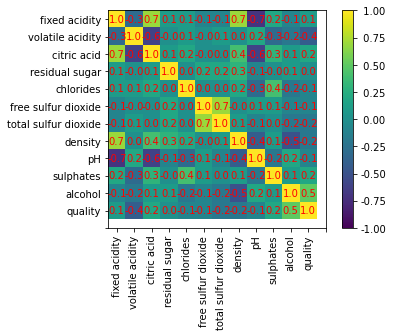

In [ ]:
# Visualizacion de la matriz
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix_total)
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2,3,4,5,6,7,8,9,10,11,12), ticklabels=red_wine.columns)
plt.xticks(rotation = 90)
ax.yaxis.set(ticks=(0, 1, 2,3,4,5,6,7,8,9,10,11,12), ticklabels=red_wine.columns)
for i in range(12):
    for j in range(12):
        ax.text(j, i, corr_matrix_total[i, j], ha='center', va='center',
                color='r')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.show()

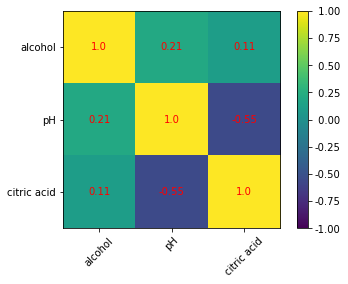

In [ ]:
# Visualizacion de la matriz
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix_s)
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=red_wine_s.columns)
plt.xticks(rotation = 45)
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=red_wine_s.columns)
for i in range(3):
    for j in range(3):
        ax.text(j, i, corr_matrix_s[i, j], ha='center', va='center',
                color='r')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.show()